In [2]:
from sklearn.ensemble import  RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split, KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

Best Hyperparameters: {'classifier__max_depth': 5, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}
Cross-validation score: 0.01
Mean Absolute Error: 0.03
Mean Squared Error: 0.03
Root Mean Squared Error: 0.17
R-squared: 0.76
Accuracy:0.97
Confusion Matrix:
[[ 5  0]
 [ 1 27]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.96      0.98        28

    accuracy                           0.97        33
   macro avg       0.92      0.98      0.95        33
weighted avg       0.97      0.97      0.97        33



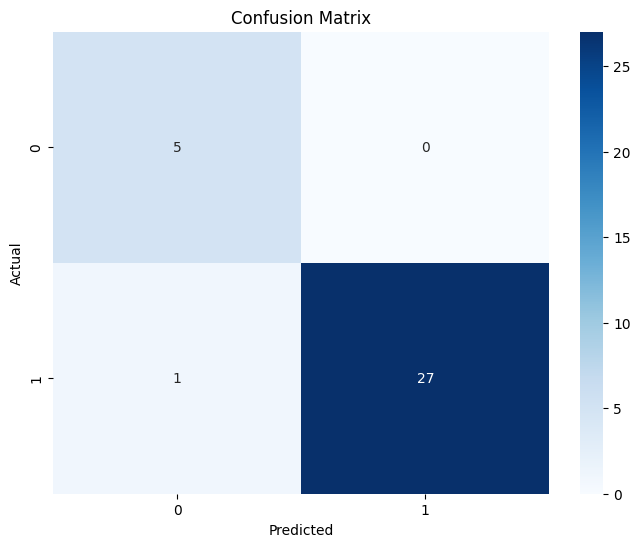

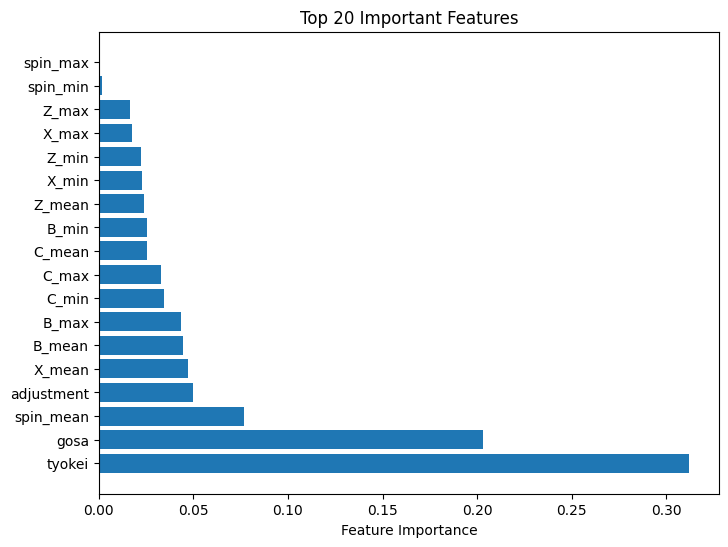

In [3]:
# Load the dataset
d = pd.read_csv(r"C:\Users\00220401626\Desktop\soukansun2.csv", encoding='cp932')
d.drop("Unnamed: 0", inplace=True, axis=1)

# Create a LabelEncoder object
le = LabelEncoder()

# Label encode the target variable
d['judge'] = le.fit_transform(d['judge'])

# Set up the explanatory variable and response variable
X = d.drop('judge', axis=1)
y = d['judge']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('classifier', RandomForestClassifier(random_state=42))
])

params = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [5, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Set up GridSearchCV for hyperparameter tuning
# Set up K-fold cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

grid_search = GridSearchCV(pipeline, param_grid=params, cv=kfold, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the model using GridSearchCV
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(f"Best Hyperparameters: {grid_search.best_params_}")

# Print the cross-validation score
print(f"Cross-validation score: {-grid_search.best_score_:.2f}")

# Get the predictions on the test set using the best estimator
y_pred = grid_search.best_estimator_.predict(X_test)

# Define evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")
print(f"Accuracy:{accuracy:.2f}")


# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a classification report
cr = classification_report(y_test, y_pred)

# Print the confusion matrix and classification report
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(cr)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Plot the feature importance
feature_importance = grid_search.best_estimator_.named_steps['classifier'].feature_importances_
feature_names = X_train.columns.values
sorted_idx = feature_importance.argsort()[::-1][:20]
pos = np.arange(sorted_idx.shape[0]) + 0.5
plt.figure(figsize=(8, 6))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, feature_names[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Top 20 Important Features')
plt.show()